# Кластеризация известного датасета [Iris](https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-plants-dataset)

- [**Wiki** Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)
- [**kaggle** Iris Species](https://www.kaggle.com/datasets/uciml/iris)

Используется [sklearn.cluster.KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

3 класса ирисов по 50 наблюдений в каждом

- Setosa
- Versicolour
- Virginica

Атрибуты

- sepal length in cm (чашелистик)
- sepal width in cm
- petal length in cm (лепесток)
- petal width in cm
- class

Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, Species

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [5]:
iris_df = pd.read_csv('../../data/KMeans_Clustering_Iris.csv', index_col='Id')
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris_df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
iris_df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [7]:
data = iris_df.drop(columns=['Species'])
kmeans = KMeans(n_clusters=2).fit(data)

In [8]:
unique, counts = np.unique(kmeans.labels_, return_counts=True)
dict(zip(unique, counts))

{0: 97, 1: 53}

In [9]:
y = []
x = list(range(2, 11))
stats = []
for n_clusters in x:
    kmeans = KMeans(n_clusters=n_clusters).fit(data)
    stats.append([n_clusters, kmeans.inertia_, kmeans.n_iter_])

<AxesSubplot: xlabel='n_clusters', ylabel='inertia'>

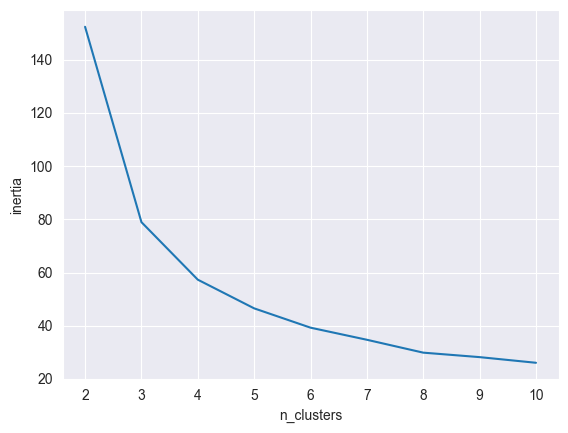

In [10]:
data = pd.DataFrame.from_records(stats, columns=['n_clusters', 'inertia',  'n_iters'])
sns.lineplot(data=data, x='n_clusters', y='inertia')
